In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from keras.layers import Dense,Conv1D,Lambda,SimpleRNN,LSTM,Bidirectional,Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.losses import Huber

Using TensorFlow backend.


In [4]:
from matplotlib import pyplot as plt

In [6]:
data = pd.read_csv("Sunspots.csv")

In [7]:
data.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [8]:
time_step = data['Unnamed: 0']

In [9]:
sunspots = data['Monthly Mean Total Sunspot Number']

In [10]:
sunspots = sunspots.to_numpy()

In [11]:
time_step = time_step.to_numpy()

In [12]:
type(sunspots)

numpy.ndarray

In [13]:
sunspots.shape

(3252,)

In [14]:
time_step.shape

(3252,)

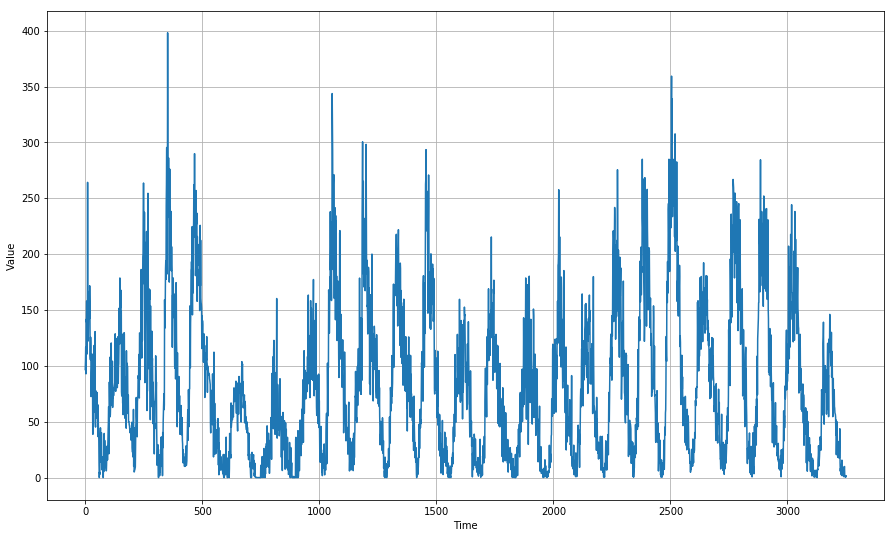

In [15]:
plt.figure(figsize=(15,9))
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.plot(time_step,sunspots)

In [42]:
split_time = 3000
time_train = time_step[:split_time]
time_valid = time_step[split_time:]
x_train = sunspots[:split_time]
x_valid = sunspots[split_time:]

window_size = 61
batch_size = 128

### Some Important Functions

In [17]:
def series(n): # Takes an Integer
    return np.arange(n)

def window(a,window_size=1): # Takes a 1-D Series and a number
    b = len(a)
    c = b-window_size
    data = np.zeros([c+1,window_size])
    for i in range(c+1):
        data[i] = a[i:i+window_size]
    return data

def label_feature(a): # Takes a numpy 2-D Array
    m = a.shape[1]
    copy_a = a.copy()
    copy_a = copy_a.T
    y = copy_a[m-1]
    x = copy_a[0:m-1].T
    return (x,y)

def shuffle(b): # Takes a list which is made of x_train and x_test
    n = b[0]
    m = n.shape[0]
    x = np.zeros(n.shape)
    y = np.zeros(m)
    indices = np.random.permutation(m)
    list_ = []
    for i in range(m):
        x[i],y[i] = (b[0][indices[i]],b[1][indices[i]])
    list_ = (x,y)
    return list_

def batch(shuffled_data,batch_size): # Takes a list and a number
    z =[]
    n = shuffled_data[0]
    m1 = n.shape[1]
    m0 = n.shape[0]
    no_of_batches = int(m0/batch_size)
    x = np.zeros([batch_size,m1])
    y = np.zeros(batch_size)
    for i in range(no_of_batches):
        for j in range(batch_size):
            x[j],y[j] = (shuffled_data[0][j+i*batch_size],shuffled_data[1][j+i*batch_size])
        list_ = (x.copy(),y.copy())
        z.append(list_)
    return z

def display(a): # Takes a List
    n = a[0].shape[0]
    for i in range(n):
        print(a[0][i], a[1][i])
        

def dataset(a, window_size = 1, batch_size = 1):
    windowed_data = window(a,window_size)
    x,y = label_feature(windowed_data)
    list1 = (x,y)
    list2 = shuffle(list1)
    final = batch(list2,batch_size)
    
    return final

In [43]:
model = Sequential([
    Conv1D(filters = 64, kernel_size = 5, strides = 1, padding ="causal", activation = "relu",input_shape = [None,1]),
    LSTM(60, return_sequences = True),
    LSTM(60, return_sequences = True),
    Dense(30, activation = "relu"),
    Dense(10, activation = "relu"),
    Dense(1),
    #Lambda(lambda x : x*400)
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, None, 32)          192       
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          8320      
_________________________________________________________________
dense_1 (Dense)              (None, None, 30)          990       
_________________________________________________________________
dense_2 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_3 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda_1 (Lambda)            (None, None, 1)          

In [44]:
model.compile(loss = Huber(),optimizer = SGD(lr = 1e-5,momentum = 0.9))

In [45]:
train_set = dataset(x_train,window_size,batch_size)

In [46]:
num = len(train_set)

### Metrics

In [47]:
def mse(a,b):
    return np.sum((np.square(a-b))/len(a))
def mae(a,b):
    return np.sum((np.abs(a-b))/len(a))
def rmse(a,b):
    return np.sqrt(np.sum((np.square(a-b))/len(a)))
def mape(a,b):
    return np.sum((np.abs((a-b)/a))/len(a))

In [48]:
train_set[0][0].shape

(128, 60)

In [49]:
train_set[0][1].shape

(128,)

In [50]:
for  i in range(num):
    x = train_set[i][0]
    x = x.reshape(128,60,1)
    y = train_set[i][1]
    y = y.reshape(128,1,1)
    model.fit(x,y,epochs = 300,verbose = 2)

Epoch 1/300
 - 1s - loss: 76.7110
Epoch 2/300
 - 0s - loss: 76.7096
Epoch 3/300
 - 0s - loss: 76.7073
Epoch 4/300
 - 0s - loss: 76.7046
Epoch 5/300
 - 0s - loss: 76.7017
Epoch 6/300
 - 0s - loss: 76.6988
Epoch 7/300
 - 0s - loss: 76.6960
Epoch 8/300
 - 0s - loss: 76.6931
Epoch 9/300
 - 0s - loss: 76.6903
Epoch 10/300
 - 0s - loss: 76.6876
Epoch 11/300
 - 0s - loss: 76.6850
Epoch 12/300
 - 0s - loss: 76.6824
Epoch 13/300
 - 0s - loss: 76.6798
Epoch 14/300
 - 0s - loss: 76.6772
Epoch 15/300
 - 0s - loss: 76.6746
Epoch 16/300
 - 0s - loss: 76.6720
Epoch 17/300
 - 0s - loss: 76.6695
Epoch 18/300
 - 1s - loss: 76.6669
Epoch 19/300
 - 1s - loss: 76.6643
Epoch 20/300
 - 1s - loss: 76.6616
Epoch 21/300
 - 1s - loss: 76.6590
Epoch 22/300
 - 1s - loss: 76.6565
Epoch 23/300
 - 1s - loss: 76.6539
Epoch 24/300
 - 1s - loss: 76.6512
Epoch 25/300
 - 1s - loss: 76.6486
Epoch 26/300
 - 1s - loss: 76.6458
Epoch 27/300
 - 1s - loss: 76.6431
Epoch 28/300
 - 0s - loss: 76.6403
Epoch 29/300
 - 0s - loss: 76

Epoch 232/300
 - 0s - loss: 76.2619
Epoch 233/300
 - 0s - loss: 76.2603
Epoch 234/300
 - 0s - loss: 76.2586
Epoch 235/300
 - 0s - loss: 76.2570
Epoch 236/300
 - 0s - loss: 76.2554
Epoch 237/300
 - 0s - loss: 76.2538
Epoch 238/300
 - 0s - loss: 76.2522
Epoch 239/300
 - 0s - loss: 76.2506
Epoch 240/300
 - 0s - loss: 76.2491
Epoch 241/300
 - 0s - loss: 76.2475
Epoch 242/300
 - 0s - loss: 76.2459
Epoch 243/300
 - 0s - loss: 76.2443
Epoch 244/300
 - 0s - loss: 76.2428
Epoch 245/300
 - 0s - loss: 76.2412
Epoch 246/300
 - 0s - loss: 76.2396
Epoch 247/300
 - 0s - loss: 76.2381
Epoch 248/300
 - 0s - loss: 76.2365
Epoch 249/300
 - 0s - loss: 76.2350
Epoch 250/300
 - 0s - loss: 76.2334
Epoch 251/300
 - 0s - loss: 76.2319
Epoch 252/300
 - 0s - loss: 76.2303
Epoch 253/300
 - 0s - loss: 76.2288
Epoch 254/300
 - 0s - loss: 76.2272
Epoch 255/300
 - 0s - loss: 76.2257
Epoch 256/300
 - 0s - loss: 76.2242
Epoch 257/300
 - 0s - loss: 76.2226
Epoch 258/300
 - 0s - loss: 76.2211
Epoch 259/300
 - 0s - loss: 

Epoch 163/300
 - 0s - loss: 82.7094
Epoch 164/300
 - 0s - loss: 82.7073
Epoch 165/300
 - 0s - loss: 82.7051
Epoch 166/300
 - 0s - loss: 82.7029
Epoch 167/300
 - 0s - loss: 82.7007
Epoch 168/300
 - 0s - loss: 82.6985
Epoch 169/300
 - 0s - loss: 82.6964
Epoch 170/300
 - 0s - loss: 82.6942
Epoch 171/300
 - 0s - loss: 82.6920
Epoch 172/300
 - 0s - loss: 82.6898
Epoch 173/300
 - 0s - loss: 82.6877
Epoch 174/300
 - 0s - loss: 82.6855
Epoch 175/300
 - 0s - loss: 82.6832
Epoch 176/300
 - 0s - loss: 82.6810
Epoch 177/300
 - 0s - loss: 82.6788
Epoch 178/300
 - 0s - loss: 82.6766
Epoch 179/300
 - 0s - loss: 82.6744
Epoch 180/300
 - 0s - loss: 82.6721
Epoch 181/300
 - 0s - loss: 82.6699
Epoch 182/300
 - 0s - loss: 82.6677
Epoch 183/300
 - 0s - loss: 82.6655
Epoch 184/300
 - 0s - loss: 82.6632
Epoch 185/300
 - 0s - loss: 82.6610
Epoch 186/300
 - 0s - loss: 82.6587
Epoch 187/300
 - 0s - loss: 82.6565
Epoch 188/300
 - 0s - loss: 82.6542
Epoch 189/300
 - 0s - loss: 82.6519
Epoch 190/300
 - 0s - loss: 

Epoch 94/300
 - 0s - loss: 87.4851
Epoch 95/300
 - 0s - loss: 87.4803
Epoch 96/300
 - 0s - loss: 87.4755
Epoch 97/300
 - 0s - loss: 87.4707
Epoch 98/300
 - 0s - loss: 87.4659
Epoch 99/300
 - 0s - loss: 87.4610
Epoch 100/300
 - 0s - loss: 87.4560
Epoch 101/300
 - 0s - loss: 87.4511
Epoch 102/300
 - 0s - loss: 87.4462
Epoch 103/300
 - 0s - loss: 87.4412
Epoch 104/300
 - 0s - loss: 87.4362
Epoch 105/300
 - 0s - loss: 87.4311
Epoch 106/300
 - 0s - loss: 87.4260
Epoch 107/300
 - 0s - loss: 87.4208
Epoch 108/300
 - 0s - loss: 87.4156
Epoch 109/300
 - 0s - loss: 87.4103
Epoch 110/300
 - 0s - loss: 87.4051
Epoch 111/300
 - 0s - loss: 87.3997
Epoch 112/300
 - 0s - loss: 87.3944
Epoch 113/300
 - 0s - loss: 87.3889
Epoch 114/300
 - 0s - loss: 87.3836
Epoch 115/300
 - 0s - loss: 87.3780
Epoch 116/300
 - 0s - loss: 87.3725
Epoch 117/300
 - 0s - loss: 87.3669
Epoch 118/300
 - 0s - loss: 87.3613
Epoch 119/300
 - 0s - loss: 87.3556
Epoch 120/300
 - 0s - loss: 87.3500
Epoch 121/300
 - 0s - loss: 87.344

KeyboardInterrupt: 

In [27]:
forecast = []

for time in range(len(sunspots) - 30):
    a = sunspots[time:time + 30]
    a = a.reshape(1,30,1)
    forecast.append(model.predict(a))
# np.newaxis automatically changes the data into input data_type
forecast_valid = forecast[split_time-30:]
results_valid = np.array(forecast_valid)[:, 0, 0]
results = np.array(forecast)[:,0,0]

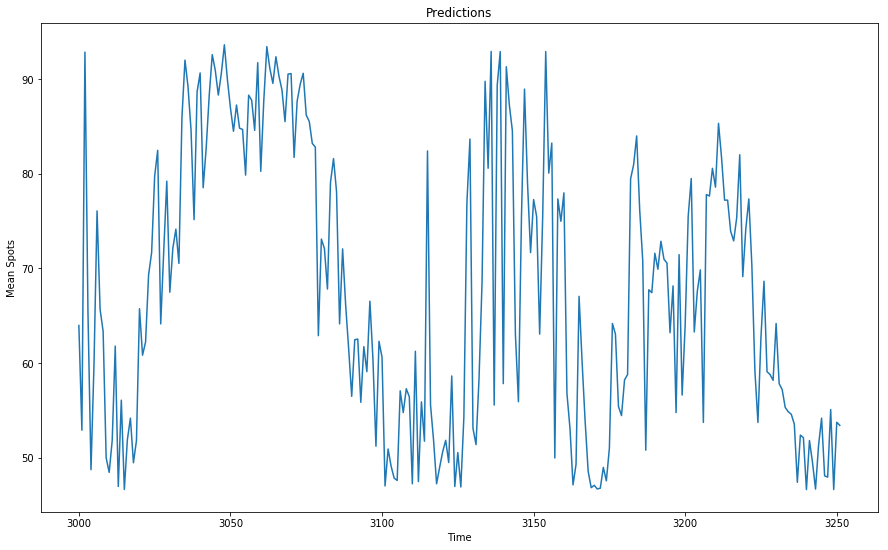

In [88]:
plt.figure(figsize=(15,9))
plt.plot(time_valid,results_valid)
#plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Mean Spots")
plt.title("Predictions")
plt.savefig("Predictions.png")

#plt.plot(time_valid,x_valid)

In [52]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'sunspot.pkl') 

['sunspot.pkl']